In [61]:
#DATA CLEANING AND MERGING

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Specify the file path
file_path = r"C:\Users\madhvi\Downloads\Data Analyst Intern Assignment - Excel.xlsx"

In [7]:

# Load the Excel file
excel_data = pd.ExcelFile(file_path)


# Display available sheet names
print("Sheet names:", excel_data.sheet_names)

Sheet names: ['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']


In [9]:





# Load specific sheets
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Display the first few rows of each sheet
print("UserDetails Data:")
print(user_details.head())

print("\nCookingSessions Data:")
print(cooking_sessions.head())

print("\nOrderDetails Data:")
print(order_details.head())


UserDetails Data:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  

CookingSessions Data:
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Cae

In [ ]:
# checked for duplicates

In [10]:
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)


In [ ]:
#Check for null or mismatched values in User ID and Session ID. Remove or impute as necessary.

In [11]:
# Check for nulls
print(user_details[['User ID']].isnull().sum())
print(cooking_sessions[['User ID', 'Session ID']].isnull().sum())
print(order_details[['User ID', 'Session ID']].isnull().sum())


User ID    0
dtype: int64
User ID       0
Session ID    0
dtype: int64
User ID       0
Session ID    0
dtype: int64


In [12]:
user_details['User ID'] = user_details['User ID'].astype(str)
cooking_sessions['User ID'] = cooking_sessions['User ID'].astype(str)
cooking_sessions['Session ID'] = cooking_sessions['Session ID'].astype(str)
order_details['User ID'] = order_details['User ID'].astype(str)
order_details['Session ID'] = order_details['Session ID'].astype(str)


In [13]:
cooking_order_merged = pd.merge(
    cooking_sessions,
    order_details,
    on=['User ID', 'Session ID'],  # Keys to merge on
    how='inner'  # Keep only matching rows
)


In [ ]:
#Merging

In [14]:
print(cooking_order_merged.head())
print(cooking_order_merged.info())


  Session ID User ID      Dish Name_x Meal Type_x       Session Start  \
0       S001    U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken      Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes   Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad       Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  Order ID Order Date  \
0 2024-12-01 19:30:00               30             4.5      1001 2024-12-01   
1 2024-12-01 12:20:00               20             4.0      1002 2024-12-01   
2 2024-12-02 20:10:00               40             4.8      1003 2024-12-02   
3 2024-12-02 08:00:00               30             4.2      1004 2024-12-02   
4 2024-12-03 13:15:00               15             4.7      1005 2024-12-03   

  Meal Type_y      Dish Name_y Order Status  Amount (USD) Time of Day  Rating  
0     

In [16]:
final_merged_data = pd.merge(
    cooking_order_merged,
    user_details,
    on='User ID',
    how='inner'
)
print(final_merged_data.head())
print(final_merged_data.info())


  Session ID User ID      Dish Name_x Meal Type_x       Session Start  \
0       S001    U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1       S004    U001         Pancakes   Breakfast 2024-12-02 07:30:00   
2       S009    U001  Grilled Chicken      Dinner 2024-12-05 19:00:00   
3       S002    U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
4       S006    U002        Spaghetti      Dinner 2024-12-03 18:30:00   

          Session End  Duration (mins)  Session Rating  Order ID Order Date  \
0 2024-12-01 19:30:00               30             4.5      1001 2024-12-01   
1 2024-12-02 08:00:00               30             4.2      1004 2024-12-02   
2 2024-12-05 19:40:00               40             4.9      1009 2024-12-05   
3 2024-12-01 12:20:00               20             4.0      1002 2024-12-01   
4 2024-12-03 19:00:00               30             4.3      1006 2024-12-03   

   ... Time of Day Rating      User Name  Age     Location  Registration Date  \
0  ..

In [17]:
print("CookingSessions rows:", len(cooking_sessions))
print("OrderDetails rows:", len(order_details))
print("UserDetails rows:", len(user_details))
print("Final merged rows:", len(final_merged_data))


CookingSessions rows: 16
OrderDetails rows: 16
UserDetails rows: 10
Final merged rows: 16


In [18]:
print(final_merged_data.isnull().sum())


Session ID           0
User ID              0
Dish Name_x          0
Meal Type_x          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
Order Date           0
Meal Type_y          0
Dish Name_y          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               2
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64


In [19]:
final_merged_data.to_csv('merged_data.csv', index=False)


In [20]:
# Merge on 'User ID' and 'Session ID'
merged_sessions_orders = pd.merge(cooking_sessions, order_details, on=['User ID', 'Session ID'], how='inner')


In [21]:
# Merge on 'User ID'
final_merged_df = pd.merge(merged_sessions_orders, user_details, on='User ID', how='inner')


In [22]:
# Display the first few rows to verify the merge
print(final_merged_df.head())


  Session ID User ID      Dish Name_x Meal Type_x       Session Start  \
0       S001    U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1       S004    U001         Pancakes   Breakfast 2024-12-02 07:30:00   
2       S009    U001  Grilled Chicken      Dinner 2024-12-05 19:00:00   
3       S002    U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
4       S006    U002        Spaghetti      Dinner 2024-12-03 18:30:00   

          Session End  Duration (mins)  Session Rating  Order ID Order Date  \
0 2024-12-01 19:30:00               30             4.5      1001 2024-12-01   
1 2024-12-02 08:00:00               30             4.2      1004 2024-12-02   
2 2024-12-05 19:40:00               40             4.9      1009 2024-12-05   
3 2024-12-01 12:20:00               20             4.0      1002 2024-12-01   
4 2024-12-03 19:00:00               30             4.3      1006 2024-12-03   

   ... Time of Day Rating      User Name  Age     Location  Registration Date  \
0  ..

In [25]:
print(final_merged_df.columns)


Index(['Session ID', 'User ID', 'Dish Name_x', 'Meal Type_x', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'Order ID',
       'Order Date', 'Meal Type_y', 'Dish Name_y', 'Order Status',
       'Amount (USD)', 'Time of Day', 'Rating', 'User Name', 'Age', 'Location',
       'Registration Date', 'Phone', 'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')


In [62]:
 #Analyzing the Relationship



In [41]:
# Step 4: Analyze the data
# Example: Relationship between cooking sessions and orders
sessions_orders = final_merged_df.groupby('User ID').agg({'Session ID': 'count', 'Order ID': 'count'})
sessions_orders.columns = ['CookingSessions', 'Orders']
print("Sessions vs Orders:\n", sessions_orders)

# Example: Popular dishes
popular_dishes = final_merged_df['Dish Name_x'].value_counts()
print("Popular Dishes:\n", popular_dishes)

# Example: Demographic analysis
age_gender_analysis = final_merged_df.groupby(['Age','Location']).size().reset_index(name='Count')
print("Age and Gender Analysis:\n", age_gender_analysis)

Sessions vs Orders:
          CookingSessions  Orders
User ID                         
U001                   3       3
U002                   3       3
U003                   3       3
U004                   2       2
U005                   2       2
U006                   1       1
U007                   1       1
U008                   1       1
Popular Dishes:
 Dish Name_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64
Age and Gender Analysis:
    Age       Location  Count
0   25         Austin      1
1   27  San Francisco      2
2   28       New York      3
3   30        Seattle      2
4   31          Miami      1
5   35    Los Angeles      3
6   38         Boston      1
7   42        Chicago      3


In [26]:
popular_dishes = final_merged_df['Dish Name_y'].value_counts()
print(popular_dishes)


Dish Name_y
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


In [27]:
# Create age groups
bins = [20, 30, 40, 50]
labels = ['21-30', '31-40', '41-50']
final_merged_df['Age Group'] = pd.cut(final_merged_df['Age'], bins=bins, labels=labels, right=False)

# Analyze average session rating by age group
avg_rating_by_age = final_merged_df.groupby('Age Group')['Session Rating'].mean()
print(avg_rating_by_age)


Age Group
21-30    4.633333
31-40    4.385714
41-50    4.600000
Name: Session Rating, dtype: float64


In [48]:
# Count orders per dish
popular_dishes = final_merged_df['Dish Name_y'].value_counts()

# Show the top 10 popular dishes
top_10_dishes = popular_dishes.head(10)
print(top_10_dishes)

# If ratings are available, analyze the average rating for each dish
average_ratings = final_merged_df.groupby('Dish Name_y')['Rating'].mean()
top_rated_dishes = average_ratings.sort_values(ascending=False).head(10)
print(top_rated_dishes)


Dish Name_y
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64
Dish Name_y
Grilled Chicken    4.666667
Spaghetti          4.500000
Caesar Salad       4.000000
Oatmeal            4.000000
Pancakes           4.000000
Veggie Burger      4.000000
Name: Rating, dtype: float64


In [ ]:
# Visualization

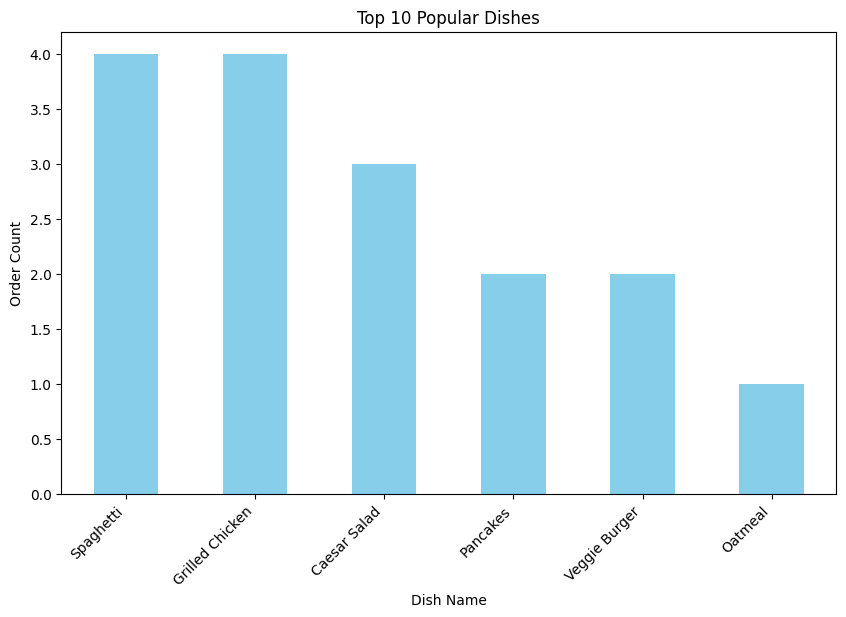

In [60]:
import matplotlib.pyplot as plt

# Plotting popular dishes
plt.figure(figsize=(10, 6))
top_10_dishes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')
plt.show()







In [80]:
# Load the dataset
file_path = 'Data Analyst Intern Assignment - Excel.xlsx.csv'  # Update this with your local file path
data = pd.read_csv(file_path)

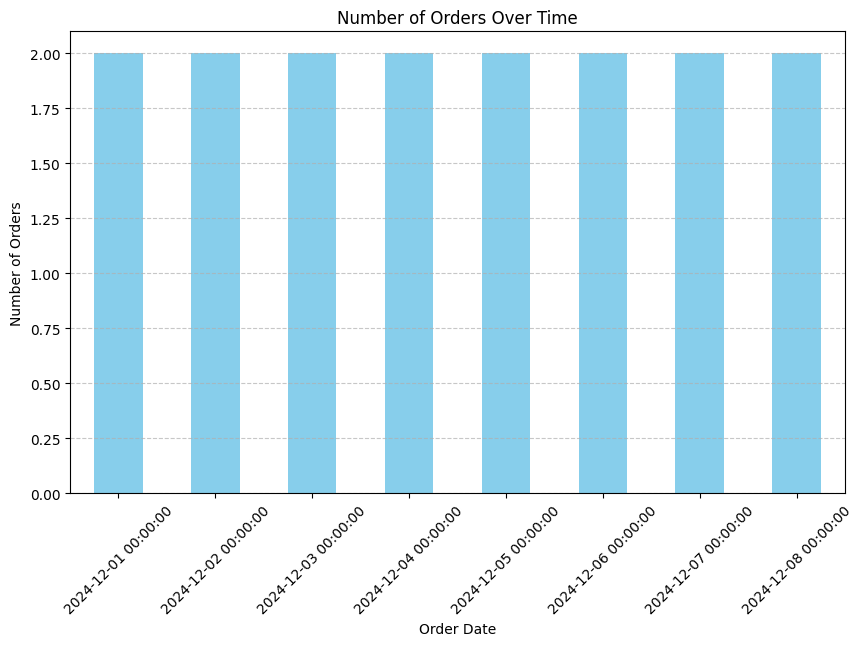

In [86]:
# Data Cleaning
# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Fill missing values in 'Rating' with the average rating
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

# Visualization 1: Orders over time
orders_over_time = data.groupby('Order Date').size()

plt.figure(figsize=(10, 6))
orders_over_time.plot(kind='bar', color='skyblue')
plt.title('Number of Orders Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





C:\Users\madhvi\AppData\Local\Temp\ipykernel_10752\2313301494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Meal Type', data=data, palette='pastel', order=data['Meal Type'].value_counts().index)


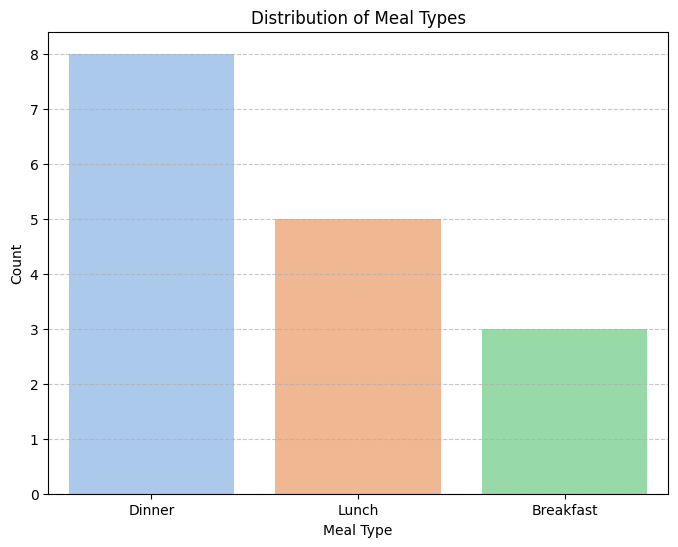

In [85]:
# Visualization 2: Distribution of meal types
plt.figure(figsize=(8, 6))
sns.countplot(x='Meal Type', data=data, palette='pastel', order=data['Meal Type'].value_counts().index)
plt.title('Distribution of Meal Types')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\madhvi\AppData\Local\Temp\ipykernel_10752\2451311666.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='coolwarm')


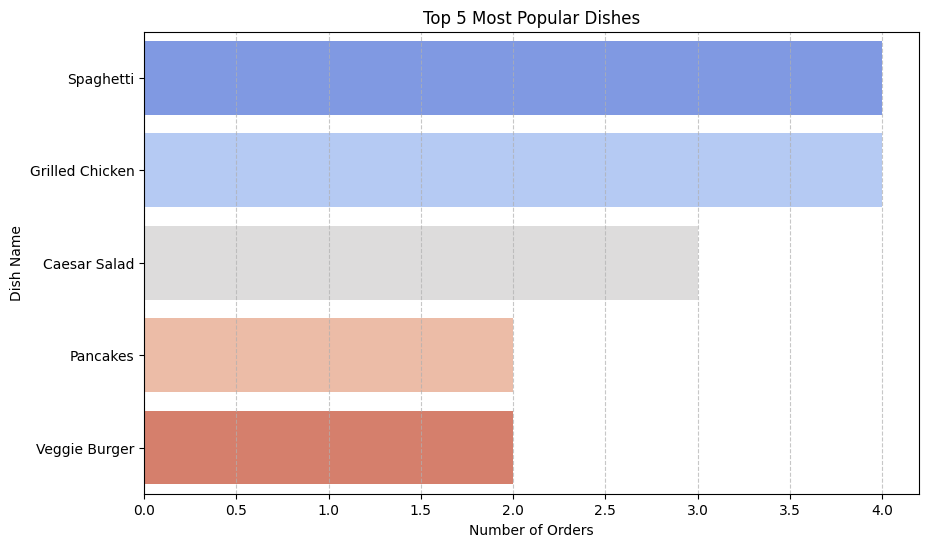

In [87]:
# Visualization 3: Most popular dishes
popular_dishes = data['Dish Name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='coolwarm')
plt.title('Top 5 Most Popular Dishes')
plt.xlabel('Number of Orders')
plt.ylabel('Dish Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


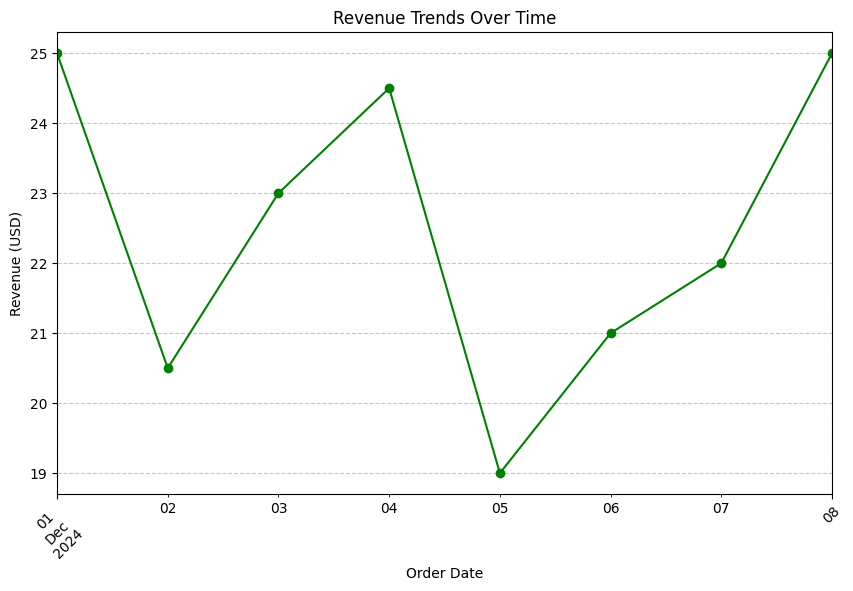

In [90]:

# Visualization 4: Revenue trends by date
revenue_over_time = data.groupby('Order Date')['Amount (USD)'].sum()

plt.figure(figsize=(10, 6))
revenue_over_time.plot(kind='line', marker='o', color='green')
plt.title('Revenue Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

C:\Users\madhvi\AppData\Local\Temp\ipykernel_10752\3562804333.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_meal_type.values, y=revenue_by_meal_type.index, palette='viridis')


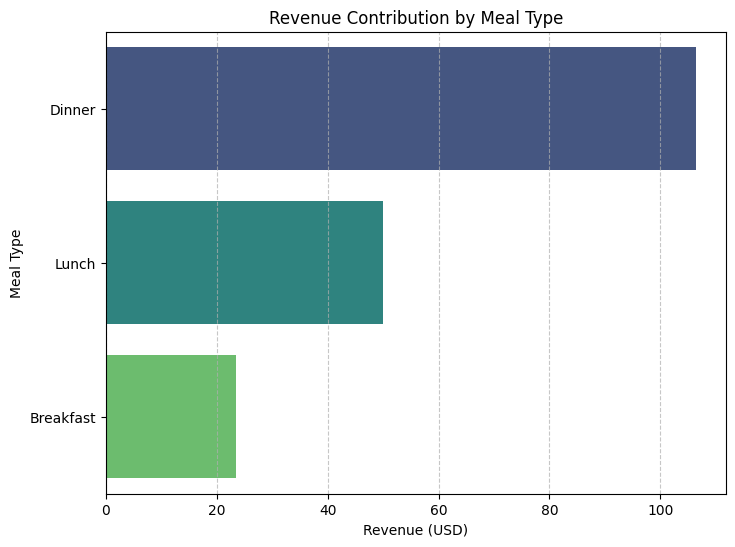

In [91]:
# Visualization 5: Contribution of meal types to revenue
revenue_by_meal_type = data.groupby('Meal Type')['Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_by_meal_type.values, y=revenue_by_meal_type.index, palette='viridis')
plt.title('Revenue Contribution by Meal Type')
plt.xlabel('Revenue (USD)')
plt.ylabel('Meal Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\madhvi\AppData\Local\Temp\ipykernel_10752\1180303645.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings.values, y=average_ratings.index, palette='magma')


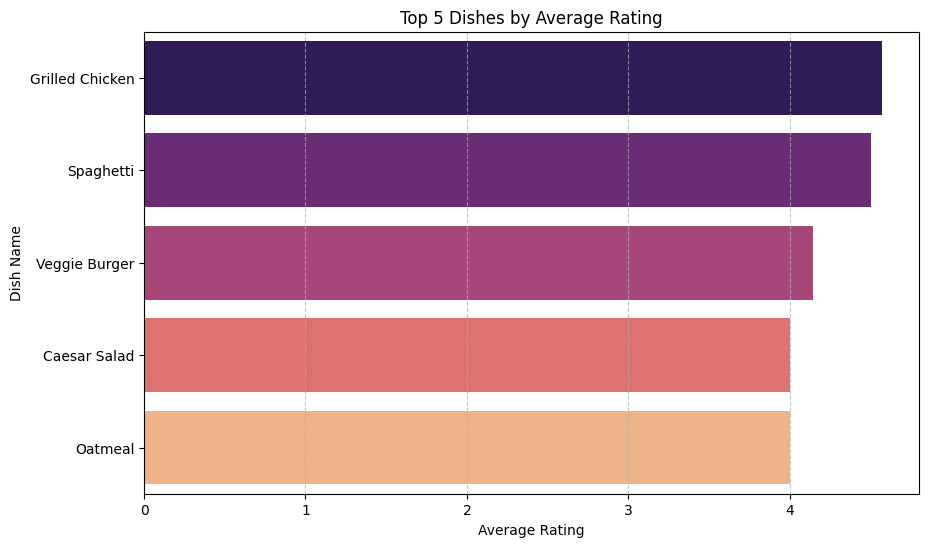

In [92]:
# Visualization 6: Average ratings by dish
average_ratings = data.groupby('Dish Name')['Rating'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.values, y=average_ratings.index, palette='magma')
plt.title('Top 5 Dishes by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Dish Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\madhvi\AppData\Local\Temp\ipykernel_10752\3885022741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Order Status', data=data, palette='Set2', order=data['Order Status'].value_counts().index)


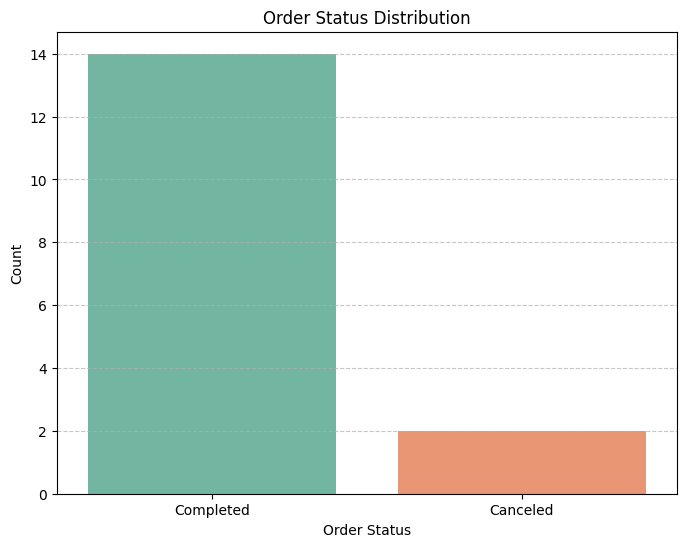

In [93]:


# Visualization 7: Order status distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Order Status', data=data, palette='Set2', order=data['Order Status'].value_counts().index)
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
